In [13]:
import requests
import json
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Helper function to fetch data for a specific ASN and time range
def fetch_bgp_update_data(asn, start_time, end_time, sampling_period=3600):
    url = f"https://stat.ripe.net/data/bgp-update-activity/data.json?resource=AS{asn}&starttime={start_time}&endtime={end_time}&sampling_period={sampling_period}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['data']['updates']
    else:
        print(f"Failed to fetch data for AS{asn}: {response.status_code}")
        return []

def plot_bgp_updates(asns, start_date, end_date):
    # Convert dates to UNIX timestamps
    start_time = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_time = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())
    
    # Fetching data for each ASN
    asn_data = {}
    for asn in asns:
        updates = fetch_bgp_update_data(asn, start_time, end_time)
        asn_data[asn] = updates
        time.sleep(1)  # Be polite to the server
    
    # Plotting data for each ASN
    for asn, data in asn_data.items():
        if data:  # Check if data is not empty
            timestamps = [datetime.fromisoformat(update['starttime']).replace(tzinfo=None) for update in data]
            num_announcements = [update['announcements'] for update in data]
    
            plt.figure(figsize=(10, 5))
            plt.plot(timestamps, num_announcements, label='Number of Announcements', marker='o')
            plt.xlabel('Time')
            plt.ylabel('Number of Announcements')
            plt.title(f'BGP Announcements Over Time for ASN {asn}')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for ASN {asn}")


## Haiti earthquake

#### AS27759 and AS52260

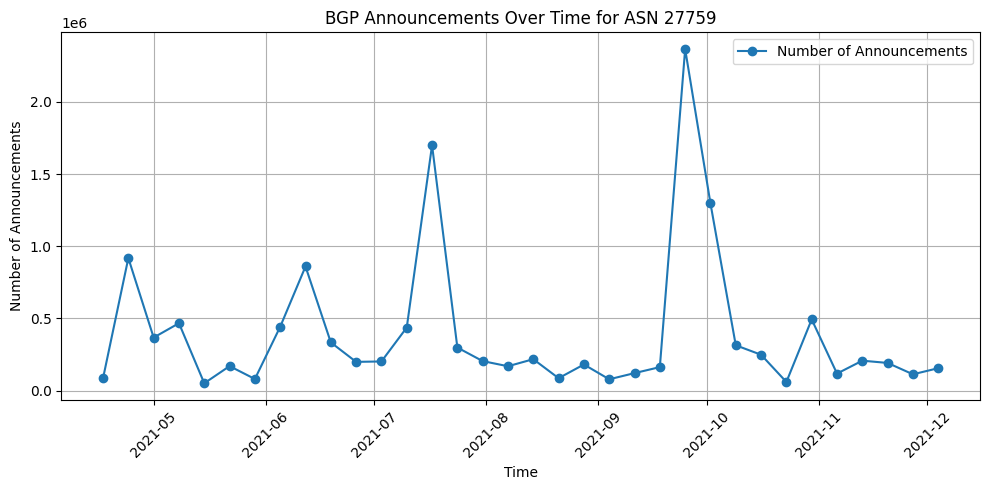

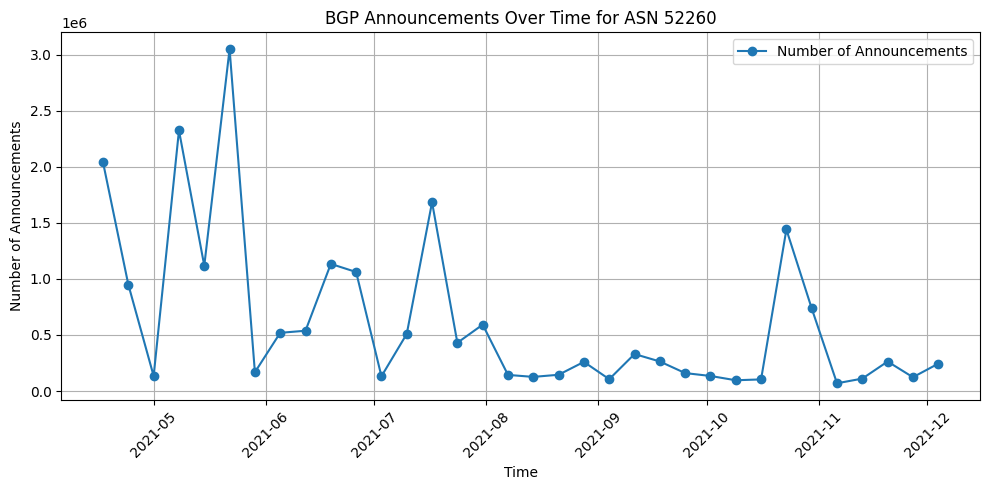

In [14]:
asns = [27759, 52260]
start_date = '2021-04-14'
end_date = '2021-12-14'
plot_bgp_updates(asns, start_date, end_date)

## Super Typhoon Rai

#### AS4775 and AS9299

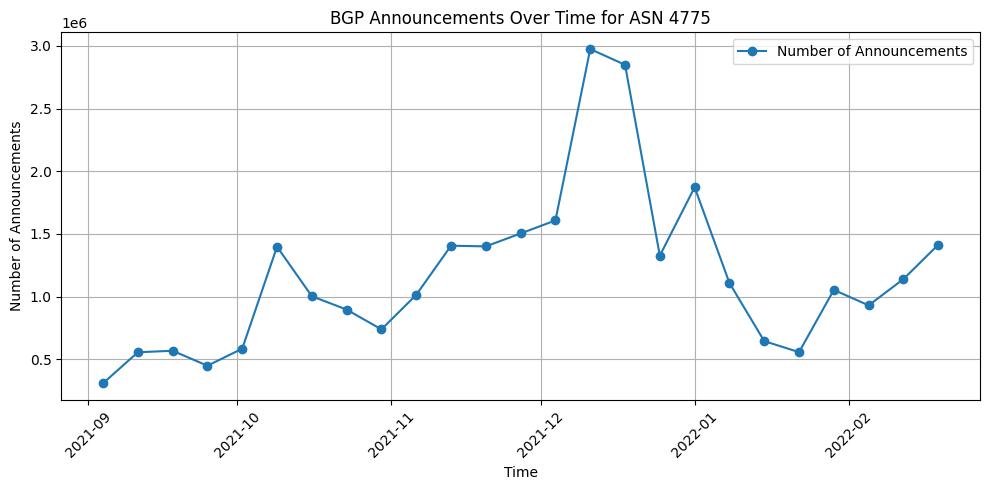

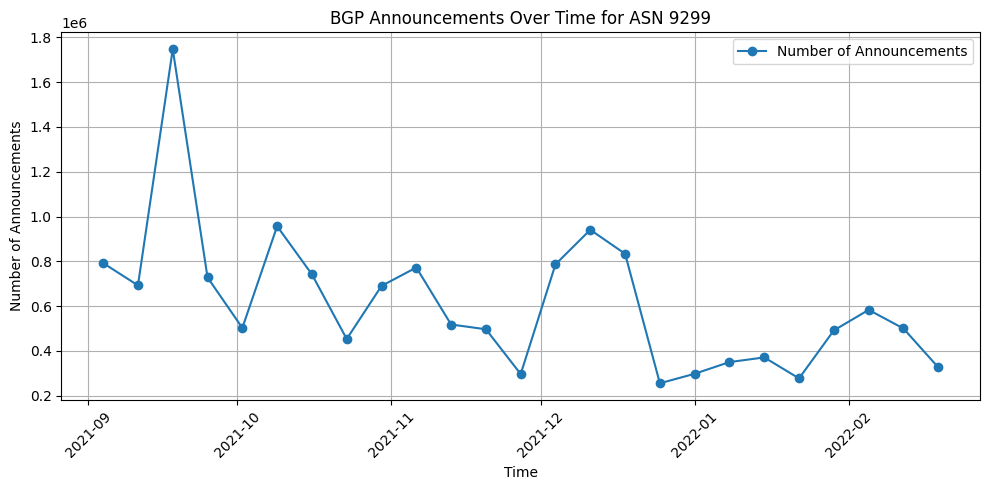

In [16]:
asns = [4775, 9299]
start_date = '2021-09-01'
end_date = '2022-03-01'
plot_bgp_updates(asns, start_date, end_date)